In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [3]:
path = "Resources/train.csv"
full_dataframe = pd.read_csv(path)
full_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
full_dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
survived_list = list(full_dataframe['Survived'])
age_list = list(full_dataframe['Age'])
class_list = list(full_dataframe['Pclass'])
sex_list = list(full_dataframe['Sex'])
fare_list = list(full_dataframe['Fare'])
embark_list = list(full_dataframe['Embarked'])
#print(type(sex_list[0]))
encoded_sex_list = []
counter=0;
for sex in sex_list:
    if (sex == "male"):
        encoded_sex_list.append(1);
    elif (sex == "female"):
        encoded_sex_list.append(0);
    else:
        encoded_sex_list.append(2);
        counter = counter+1;
print(counter)

0


In [42]:
titanic_dict = {
    "survived": survived_list,
    "pclass": class_list,
    "fare": fare_list,
    "age": age_list,
    "sex": encoded_sex_list,
    "embark": embark_list
}
titanic_df = pd.DataFrame(titanic_dict, columns=["survived", "pclass", "fare", "age", "sex", "embark"])
titanic_df.head()

,survived,pclass,fare,age,sex,embark
0,0,3,7.2500,22.0,1,S
1,1,1,71.2833,38.0,0,C
2,1,3,7.9250,26.0,0,S
3,1,1,53.1000,35.0,0,S
4,0,3,8.0500,35.0,1,S


In [43]:
titanic_df.isnull().sum()
#print(len(titanic_df['pclass']))

survived      0
pclass        0
fare          0
age         177
sex           0
embark        2
dtype: int64

In [44]:
titanic_df_cleaned = titanic_df.dropna(axis=0, how='any')
titanic_df_cleaned.isnull().sum()
#print(len(titanic_df_cleaned['pclass']))

survived    0
pclass      0
fare        0
age         0
sex         0
embark      0
dtype: int64

In [45]:
titanic_df_cleaned.to_csv("Resources/cleaned_train.csv")

In [46]:
final_titanic_df = titanic_df_cleaned.drop(labels=["survived", "embark"], axis=1)
final_titanic_df.head()

,pclass,fare,age,sex
0,3,7.2500,22.0,1
1,1,71.2833,38.0,0
2,3,7.9250,26.0,0
3,1,53.1000,35.0,0
4,3,8.0500,35.0,1


In [47]:
target = titanic_df_cleaned["survived"]
X_train, X_test, y_train, y_test = train_test_split(final_titanic_df, target, random_state=42)

k: 1, Train/Test Score: 0.989/0.629
k: 3, Train/Test Score: 0.839/0.657
k: 5, Train/Test Score: 0.787/0.646
k: 7, Train/Test Score: 0.772/0.624
k: 9, Train/Test Score: 0.758/0.624
k: 11, Train/Test Score: 0.742/0.612
k: 13, Train/Test Score: 0.740/0.635
k: 15, Train/Test Score: 0.745/0.624
k: 17, Train/Test Score: 0.740/0.629
k: 19, Train/Test Score: 0.740/0.663


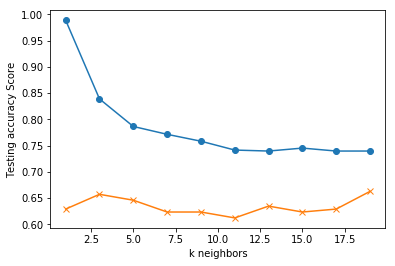

In [48]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 1, Train/Test Score: 0.989/0.629
k: 3, Train/Test Score: 0.989/0.652
k: 5, Train/Test Score: 0.989/0.624
k: 7, Train/Test Score: 0.989/0.646
k: 9, Train/Test Score: 0.989/0.618
k: 11, Train/Test Score: 0.989/0.640
k: 13, Train/Test Score: 0.989/0.635
k: 15, Train/Test Score: 0.989/0.646
k: 17, Train/Test Score: 0.989/0.657
k: 19, Train/Test Score: 0.989/0.669


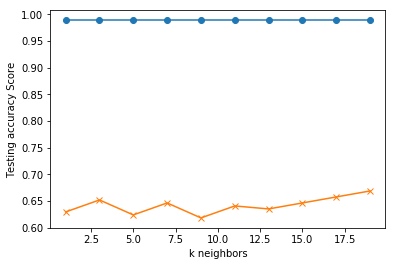

In [49]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 1, Train/Test Score: 0.987/0.624
k: 3, Train/Test Score: 0.839/0.657
k: 5, Train/Test Score: 0.788/0.646
k: 7, Train/Test Score: 0.772/0.629
k: 9, Train/Test Score: 0.760/0.624
k: 11, Train/Test Score: 0.743/0.612
k: 13, Train/Test Score: 0.738/0.629
k: 15, Train/Test Score: 0.747/0.624
k: 17, Train/Test Score: 0.740/0.629
k: 19, Train/Test Score: 0.740/0.663


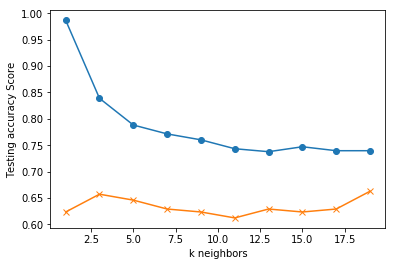

In [53]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm="brute")
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [55]:
test_df = pd.read_csv("Resources/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
test_passenger_list = list(test_df["PassengerId"])
test_class_list = list(test_df["Pclass"])
test_fare_list = list(test_df["Fare"])
test_sex_list = list(test_df["Sex"])
test_age_list = list(test_df["Age"])
test_encoded_sex_list = []
counter=0;
for sex in test_sex_list:
    if (sex == "male"):
        test_encoded_sex_list.append(1);
    elif (sex == "female"):
        test_encoded_sex_list.append(0);
    else:
        test_encoded_sex_list.append(2);
        counter = counter+1;
print(counter)

0


In [63]:
uncleaned_testing_dict = {
    "passenger_id": test_passenger_list,
    "pclass": test_class_list,
    "fare": test_fare_list,
    "age": test_age_list,
    "sex": test_encoded_sex_list,
}
uncleaned_testing_df = pd.DataFrame(uncleaned_testing_dict, columns=["passenger_id", "pclass", "fare", "age", "sex"])
uncleaned_testing_df.head()

,passenger_id,pclass,fare,age,sex
0,892,3,7.8292,34.5,1
1,893,3,7.0000,47.0,0
2,894,2,9.6875,62.0,1
3,895,3,8.6625,27.0,1
4,896,3,12.2875,22.0,0


In [66]:
cleaned_testing_df = uncleaned_testing_df.dropna(axis=0, how='any')
print(len(cleaned_testing_df['pclass']))
passenger_ids_list = list(cleaned_testing_df["passenger_id"])

331


In [67]:
final_testing_df = cleaned_testing_df.drop(labels=['passenger_id'], axis=1)
final_testing_df.head()

,pclass,fare,age,sex
0,3,7.8292,34.5,1
1,3,7.0000,47.0,0
2,2,9.6875,62.0,1
3,3,8.6625,27.0,1
4,3,12.2875,22.0,0


In [74]:
predictions = knn.predict(final_testing_df)
print(predictions)
print(type(predictions))
print(len(predictions))

[0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1
 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1
 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0
 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0]
<class 'numpy.ndarray'>
331


In [71]:
survived_results_list = list(predictions)

In [72]:
knn_submission_dict = {
    "PassengerId": passenger_ids_list,
    "Survived": survived_results_list
}
knn_submission_df = pd.DataFrame(knn_submission_dict, columns=['PassengerId', 'Survived'])
knn_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [75]:
knn_submission_df.to_csv("Resources/knn_submission.csv", index=False)

In [5]:
ag_test_df = pd.read_csv("AG_train-test.csv")
ag_target = ag_test_df["Survived"]
ag_test_df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,1,38.0,1,0,71.2833,1
2,2,1,3,1,26.0,0,0,7.9250,0
3,3,1,1,1,35.0,1,0,53.1000,0
4,4,0,3,0,35.0,0,0,8.0500,0


In [6]:
ag_test_df.drop(labels=["Unnamed: 0", "Survived"], axis=1, inplace=True)
ag_test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(ag_test_df, ag_target, random_state=42)

k: 1, Train/Test Score: 0.991/0.665
k: 3, Train/Test Score: 0.993/0.665
k: 5, Train/Test Score: 0.993/0.670
k: 7, Train/Test Score: 0.993/0.676
k: 9, Train/Test Score: 0.993/0.698
k: 11, Train/Test Score: 0.993/0.698
k: 13, Train/Test Score: 0.993/0.682
k: 15, Train/Test Score: 0.993/0.687
k: 17, Train/Test Score: 0.993/0.687
k: 19, Train/Test Score: 0.993/0.682


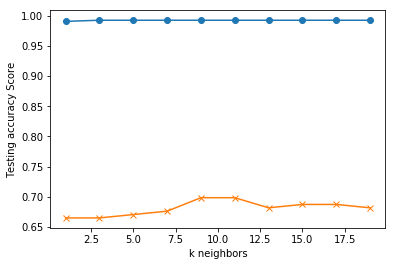

In [8]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()